# Visualize Features
This notebook visualizes features extracted from csv files to see if they would be useful to have

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Extracted Features

In [32]:
# df = pd.read_csv("../data/metasploit_mixed_0.csv")
df = pd.read_csv("../data/foo.csv")

View c2 packets

In [33]:
# view entries where c2_label is not 0
df[df['c2_label'] != 0]


,ip.proto,frame.len,tcp.flags,src_ip,dst_ip,c2_label,is_SYN,is_ACK,is_RST,is_FIN,is_PSH,is_URG,time_since_last,delta_t_ratio,rolling_mean_delta_t_3,rolling_std_delta_t_3,rolling_mean_delta_t_5,rolling_std_delta_t_5,rolling_mean_delta_t_10,rolling_std_delta_t_10
88777,6,66,2,0,1,1,1,0,0,0,0,0,0.032398,2.176700,0.019925,0.010868,0.087653,0.156495,0.144536,0.213648
88778,6,66,18,1,0,1,1,1,0,0,0,0,0.000579,0.017871,0.015954,0.015936,0.085507,0.157871,0.144592,0.213606
88779,6,54,16,0,1,1,0,1,0,0,0,0,0.000040,0.069085,0.011006,0.018528,0.012079,0.013211,0.142838,0.214833
88781,6,212,24,0,1,1,0,1,0,0,1,0,0.000996,0.434176,0.001110,0.001131,0.007261,0.014076,0.098060,0.191522
88782,6,60,16,1,0,1,0,1,0,0,0,0,0.000297,0.298193,0.001196,0.001013,0.000841,0.000886,0.044247,0.113923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135683,6,60,16,1,0,1,0,1,0,0,0,0,0.000668,8.246914,0.000514,0.000380,0.022832,0.049654,0.016868,0.034989
135684,6,201,24,1,0,1,0,1,0,0,1,0,0.000823,1.232036,0.000524,0.000391,0.000666,0.000343,0.016948,0.034946
135685,6,85,25,1,0,1,0,1,0,1,1,0,0.000338,0.410693,0.000610,0.000248,0.000541,0.000321,0.013558,0.034726
135686,6,54,16,0,1,1,0,1,0,0,0,0,0.000023,0.068047,0.000395,0.000403,0.000387,0.000353,0.013545,0.034732


## Plot Features

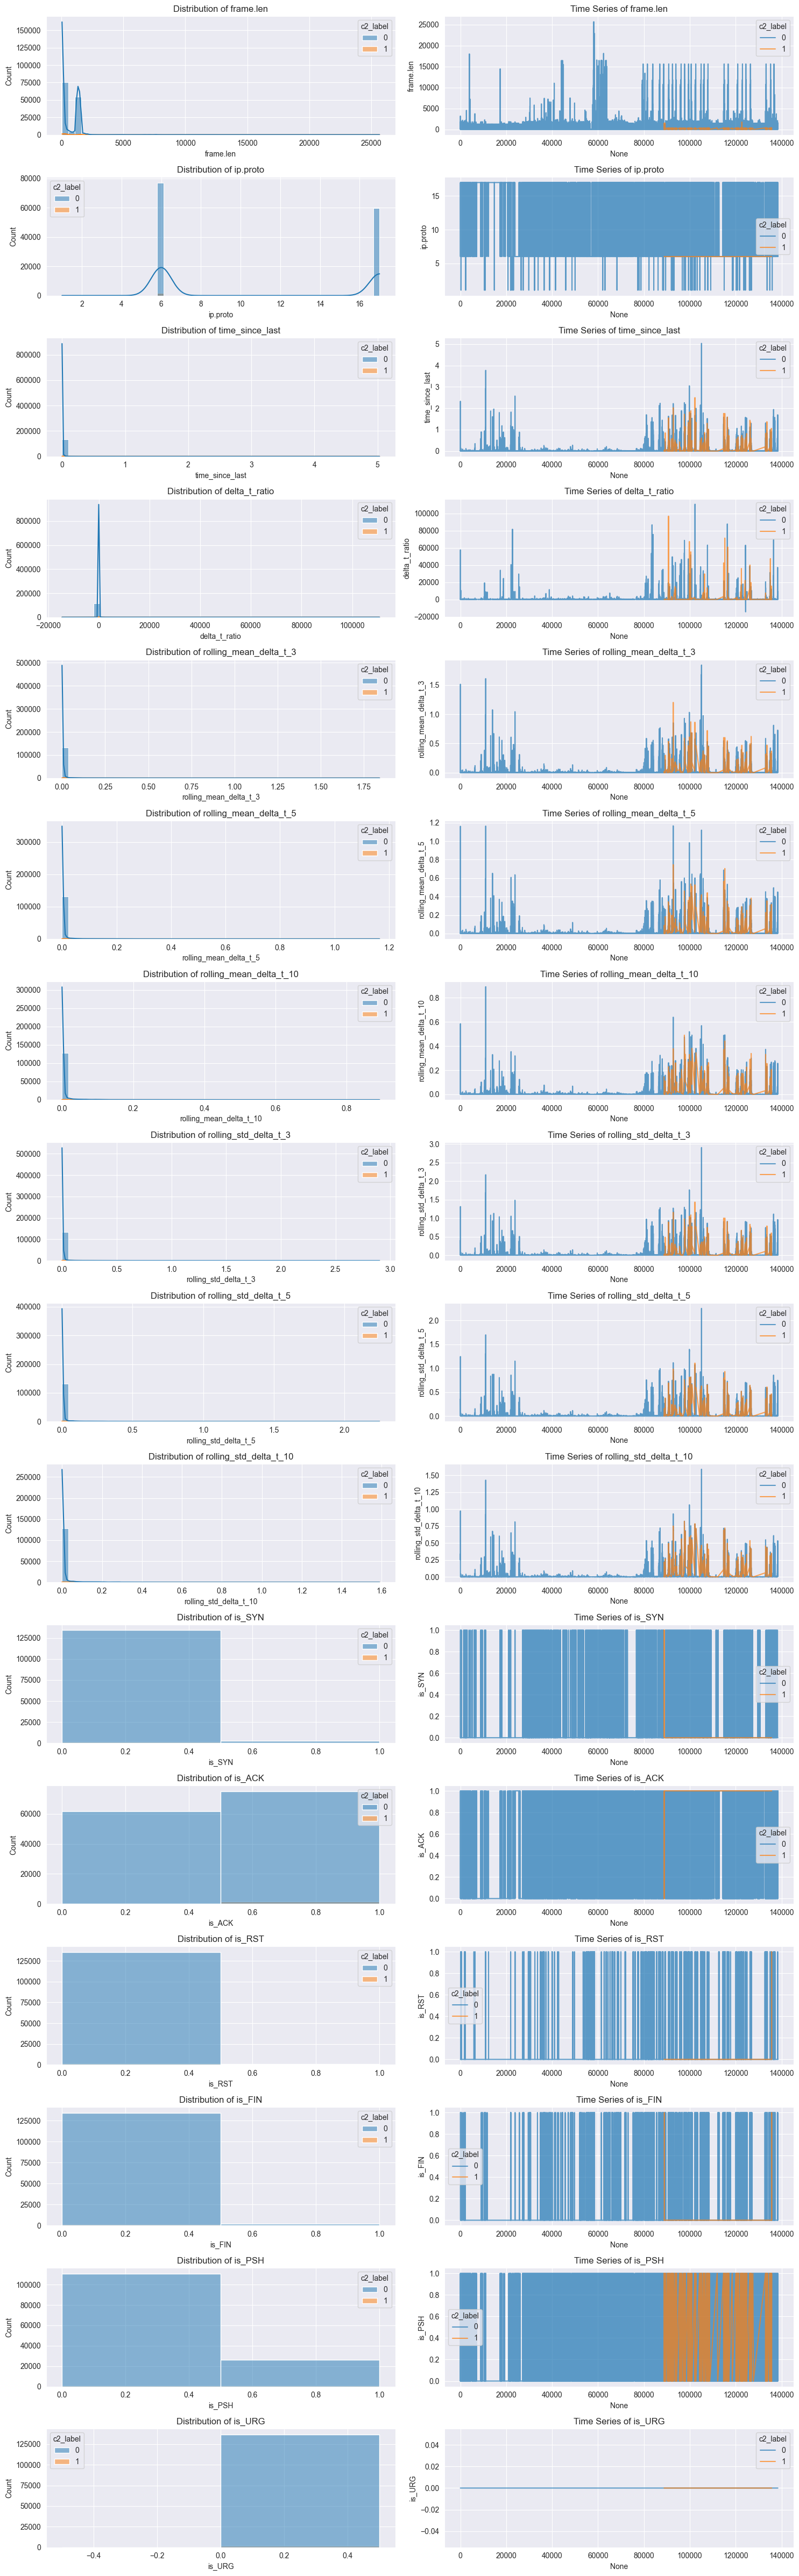

In [36]:
# Set seaborn style for better visuals
sns.set_style("darkgrid")

# Define continuous features (where KDE makes sense)
continuous_features = [
    "frame.len", "ip.proto", "time_since_last", "delta_t_ratio",
    "rolling_mean_delta_t_3", "rolling_mean_delta_t_5", "rolling_mean_delta_t_10",
    "rolling_std_delta_t_3", "rolling_std_delta_t_5", "rolling_std_delta_t_10"
]

# Define binary categorical features (where KDE should be OFF)
binary_features = ["is_SYN", "is_ACK", "is_RST", "is_FIN", "is_PSH", "is_URG"]

# Create subplots
fig, axes = plt.subplots(len(continuous_features) + len(binary_features), 2, figsize=(15, (len(continuous_features) + len(binary_features)) * 3))

# Plot continuous features (with KDE enabled)
for i, feature in enumerate(continuous_features):
    sns.histplot(df, x=feature, hue="c2_label", bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")

    sns.lineplot(data=df, x=df.index, y=feature, hue="c2_label", ax=axes[i, 1], alpha=0.7)
    axes[i, 1].set_title(f"Time Series of {feature}")

# Plot binary features (without KDE)
for i, feature in enumerate(binary_features, start=len(continuous_features)):
    sns.histplot(df, x=feature, hue="c2_label", bins=2, kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")

    sns.lineplot(data=df, x=df.index, y=feature, hue="c2_label", ax=axes[i, 1], alpha=0.7)
    axes[i, 1].set_title(f"Time Series of {feature}")

plt.tight_layout()
plt.show()
